# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
!pip install seaborn==0.11.0

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime as dt
import math

In [3]:
def generate_random_with_nan():
    # Probability of getting a NaN value
    nan_probability = 0.1  # Adjust this as needed

    if random.random() < nan_probability:
        return float('nan')  # Return NaN
    else:
        return random.randint(0, 100000)  # Return a random integer between 1 and 10000

In [4]:
categories = ['food', 'travel', 'politics', 'music', 'culture']

In [5]:
keys = ['date', 'category', 'likes']

In [6]:
first_date = '2020-01-01'

In [7]:
data = dict.fromkeys(keys)
data = {key: [] for key in data}
for i in range(800):
    date = dt.datetime.strptime(first_date, '%Y-%m-%d') + dt.timedelta(days=i)
    for category in categories:
        data['date'].append(date)
        data['category'].append(category)
        data['likes'].append(generate_random_with_nan())

In [8]:
len(data['date']), len(data['category']), len(data['likes'])

(4000, 4000, 4000)

In [9]:
df = pd.DataFrame.from_dict(data)
df

,date,category,likes
0,2020-01-01,food,60681.0
1,2020-01-01,travel,NaN
2,2020-01-01,politics,36901.0
3,2020-01-01,music,18989.0
4,2020-01-01,culture,40076.0
...,...,...,...
3995,2022-03-10,food,99459.0
3996,2022-03-10,travel,19704.0
3997,2022-03-10,politics,22585.0
3998,2022-03-10,music,31341.0


In [10]:
df = df.dropna()
df

,date,category,likes
0,2020-01-01,food,60681.0
2,2020-01-01,politics,36901.0
3,2020-01-01,music,18989.0
4,2020-01-01,culture,40076.0
5,2020-01-02,food,52977.0
...,...,...,...
3995,2022-03-10,food,99459.0
3996,2022-03-10,travel,19704.0
3997,2022-03-10,politics,22585.0
3998,2022-03-10,music,31341.0


In [11]:
df = df.drop_duplicates()
df

,date,category,likes
0,2020-01-01,food,60681.0
2,2020-01-01,politics,36901.0
3,2020-01-01,music,18989.0
4,2020-01-01,culture,40076.0
5,2020-01-02,food,52977.0
...,...,...,...
3995,2022-03-10,food,99459.0
3996,2022-03-10,travel,19704.0
3997,2022-03-10,politics,22585.0
3998,2022-03-10,music,31341.0


In [12]:
df['date'] = pd.to_datetime(df['date'])
df

,date,category,likes
0,2020-01-01,food,60681.0
2,2020-01-01,politics,36901.0
3,2020-01-01,music,18989.0
4,2020-01-01,culture,40076.0
5,2020-01-02,food,52977.0
...,...,...,...
3995,2022-03-10,food,99459.0
3996,2022-03-10,travel,19704.0
3997,2022-03-10,politics,22585.0
3998,2022-03-10,music,31341.0


In [13]:
df['likes'] = df['likes'].astype(int)
df

,date,category,likes
0,2020-01-01,food,60681
2,2020-01-01,politics,36901
3,2020-01-01,music,18989
4,2020-01-01,culture,40076
5,2020-01-02,food,52977
...,...,...,...
3995,2022-03-10,food,99459
3996,2022-03-10,travel,19704
3997,2022-03-10,politics,22585
3998,2022-03-10,music,31341


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3597 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      3597 non-null   datetime64[ns]
 1   category  3597 non-null   object        
 2   likes     3597 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 112.4+ KB


In [15]:
likes_mean = round(df['likes'].mean(), 2)
likes_mean

50217.45

In [16]:
likes_mean_category = round(df.groupby('category')['likes'].mean(), 2)
likes_mean_category

category
culture     50643.75
food        48618.01
music       50460.88
politics    50351.53
travel      51020.84
Name: likes, dtype: float64

In [17]:
most_liked = {}
least_liked = {}

In [18]:
for key in categories:
    aux = dict(likes_mean_category)[key]
    
    if aux < likes_mean:
        least_liked[key] = aux
    if aux >= likes_mean:
        most_liked[key] = aux

In [19]:
most_liked, least_liked

({'travel': 51020.84,
  'politics': 50351.53,
  'music': 50460.88,
  'culture': 50643.75},
 {'food': 48618.01})

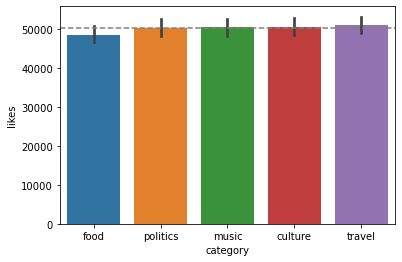

In [20]:
sns.barplot(data=df[['category', 'likes']], x='category', y='likes')
plt.xlabel('category')
plt.ylabel('likes')

plt.axhline(y=likes_mean, color='gray', linestyle='--', label='likes mean')


plt.show()

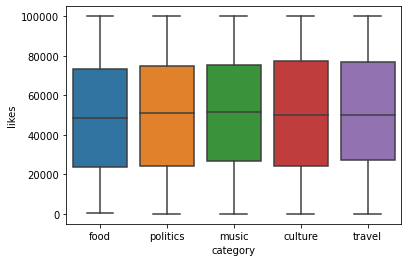

In [21]:
sns.boxplot(x='category', y='likes', data=df)
plt.show()

In [22]:
df_aux = df

In [23]:
df_aux['month'] = df_aux['date'].dt.strftime('%m')
df_aux

,date,category,likes,month
0,2020-01-01,food,60681,01
2,2020-01-01,politics,36901,01
3,2020-01-01,music,18989,01
4,2020-01-01,culture,40076,01
5,2020-01-02,food,52977,01
...,...,...,...,...
3995,2022-03-10,food,99459,03
3996,2022-03-10,travel,19704,03
3997,2022-03-10,politics,22585,03
3998,2022-03-10,music,31341,03


In [24]:
df_aux['year'] = df_aux['date'].dt.strftime('%Y')
df_aux

,date,category,likes,month,year
0,2020-01-01,food,60681,01,2020
2,2020-01-01,politics,36901,01,2020
3,2020-01-01,music,18989,01,2020
4,2020-01-01,culture,40076,01,2020
5,2020-01-02,food,52977,01,2020
...,...,...,...,...,...
3995,2022-03-10,food,99459,03,2022
3996,2022-03-10,travel,19704,03,2022
3997,2022-03-10,politics,22585,03,2022
3998,2022-03-10,music,31341,03,2022


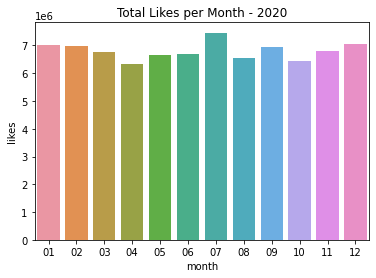

In [25]:
#plot for 2020
df_aux_2020 = df_aux.loc[df_aux['year'] == '2020']
df_aux_2020 = df_aux_2020.groupby('month')['likes'].sum().reset_index()
sns.barplot(data=df_aux_2020[['month', 'likes']], x='month', y='likes')
plt.xlabel('month')
plt.ylabel('likes')
plt.title('Total Likes per Month - 2020')


plt.show()

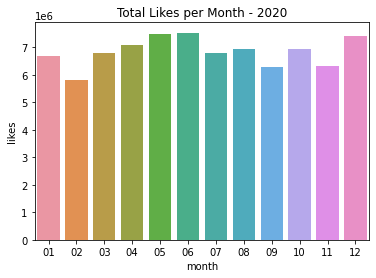

In [26]:
#plot for 2021
df_aux_2021 = df_aux.loc[df_aux['year'] == '2021']
df_aux_2021 = df_aux_2021.groupby('month')['likes'].sum().reset_index()
sns.barplot(data=df_aux_2021[['month', 'likes']], x='month', y='likes')
plt.xlabel('month')
plt.ylabel('likes')
plt.title('Total Likes per Month - 2020')


plt.show()

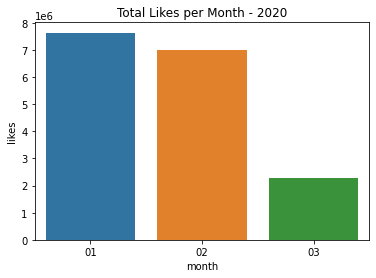

In [27]:
#plot for 2022
df_aux_2022 = df_aux.loc[df_aux['year'] == '2022']
df_aux_2022 = df_aux_2022.groupby('month')['likes'].sum().reset_index()
sns.barplot(data=df_aux_2022[['month', 'likes']], x='month', y='likes')
plt.xlabel('month')
plt.ylabel('likes')
plt.title('Total Likes per Month - 2020')


plt.show()